## Lab 1: Data Generation and Visualization

These random datasets will be useful in later laboratories to test some of the algorithms seen in class.

Try to solve the following exercises using only the ```numpy``` and ```matplotlib``` python libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1: Gaussian
- Generate a dataset drawn from two independent Gaussians, each of which represents a class. You are free to select the number of desired datapoints, the mean and the variance of the two distributions. 
- Flip randomly a percentage of the labels to introduce some noise and plot the results. 

Given the binary classification setting we are considering, a flip implies that a point in class 0 will be assigned to class 1 and viceversa. 

In [4]:
def mixGauss(means, sigmas, n):
    """
    Parameters:
    means : matrix/list of float of dimension n_classes x dim_data
        Means of the Gaussian functions
    sigmas: array/list of float of dimension n_classses
        Standard deviation of the Gaussian functions
    n: int
        Number of points for each class
    """
    means = np.array(means)
    sigmas = np.array(sigmas)
    
    d = np.shape(means)[1]
    num_classes = sigmas.size
    
    data = np.full((n*num_classes, d), np.inf)
    labels = np.zeros(n*num_classes)

    for i, sigma in enumerate(sigmas):
        data[i*n:(i+1)*n] = np.random.multivariate_normal(mean=means[i], cov = np.eye(d)*sigmas[i]**2, size=n)
        labels[i*n:(i+1)*n] = i
    
    if (num_classes==2):
        labels[labels==0]=-1
    
    return data, labels

In [5]:
means = [[3,0], [0,6]]
sigmas=[0.9, 0.9]
n=100

X, labels = mixGauss(means, sigmas, n)

<Figure size 640x480 with 0 Axes>

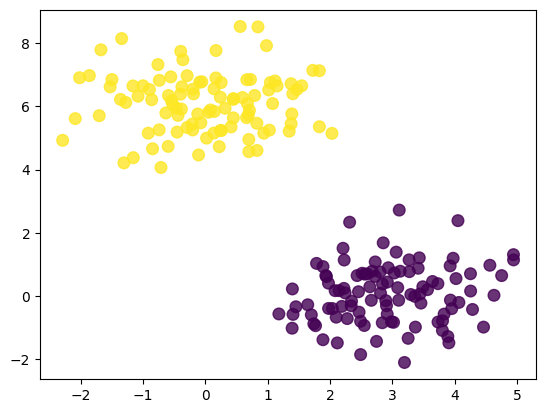

In [6]:
fig = plt.figure()
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], s=70, c=labels, alpha=0.8)
plt.show()

In [7]:
def labelsnoise(p, labels):
    """
    Parameters:
    p: float
        Percentage of labels to flip
    labels: array of int of dimension n_points
        Array containing label indices
    """
    points = np.shape(labels)[0]
    noisylabels = np.copy(np.squeeze(labels))
    n_flips = int(np.floor(points*p))
    idx_flip = np.random.choice(points, size = n_flips, replace=False) #without replacement
    noisylabels[idx_flip] = -noisylabels[idx_flip] #since -1,1 are the possibilities instead of 0,1
    return noisylabels

In [8]:
noisy_labels = labelsnoise(0.5, labels)
noisy_labels

array([ 1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,
       -1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1., -1., -1.,  1.,
        1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1., -1.,  1., -1.,
        1., -1.,  1.,  1., -1., -1.,  1.,  1., -1.,  1., -1., -1.,  1.,
        1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1.,  1.,
       -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.,
        1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,
       -1., -1.,  1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.,
       -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1., -1.,
        1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1., -1., -1.,
        1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1.,  1., -1.,  1., -1., -1., -1., -1.,  1., -1., -1.,  1.,  1.,
       -1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,
       -1.,  1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1., -1

<Figure size 640x480 with 0 Axes>

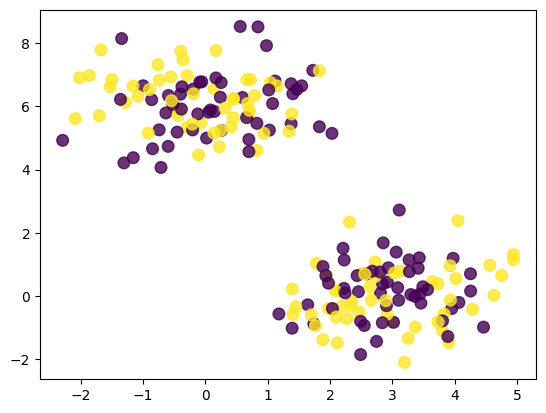

In [9]:
fig = plt.figure()
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], s=70, c=noisy_labels, alpha=0.8)
plt.show()

In [10]:
means = [[3,0,-2], [0,6,2]]
sigmas=[0.9, 0.9]
n=1000

X, labels = mixGauss(means, sigmas, n)

noisy_labels = labelsnoise(0.1, labels)

<class 'matplotlib.axes._subplots.Axes3DSubplot'>


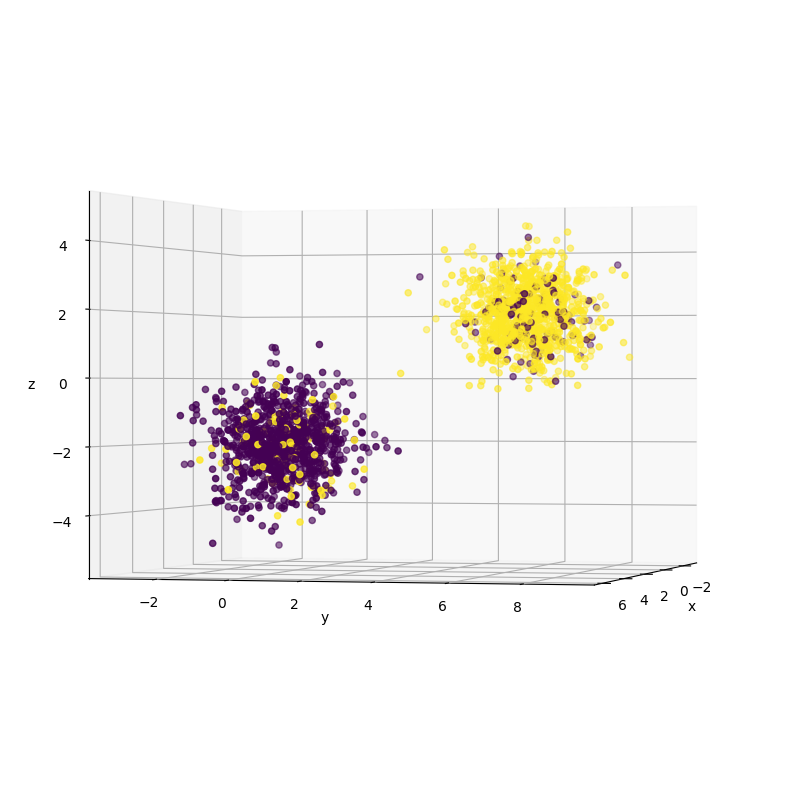

In [11]:
plt.figure(figsize=(12,10))
axes = plt.axes(projection='3d')
print(type(axes))
axes.scatter3D(X[:,0], X[:,1], X[:,2], c=noisy_labels)

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')
axes.view_init(0,15)

plt.show()

## Exercise 2: Swiss roll 
The Swiss Roll is defined by the following mapping:
$$x = \phi\cos(\phi) , y= \phi\sin(\phi) , z = \psi$$
with $\phi \in(1.5\pi, 4.5\pi)$ and $\psi \in(0,10)$


Create the dataset of $n=1000$ points and plot them both in 2d and 3d.

In [30]:
def swiss_roll(n):
    """
    Parameters:
    n: int
        Number of points to generate"""
    
    data = np.zeros((n,3))
    phi = np.random.uniform(low=1.5*np.pi, high=4.5*np.pi, size=n)
    psi = np.random.uniform(0,10,n)
            
    data[:,0]=phi*np.cos(phi) #x coordinte
    data[:,1]=phi*np.sin(phi) #y coordinate
    data[:,2]=psi #z coordinate
    return data

In [31]:
X = swiss_roll(5000)

<class 'matplotlib.axes._subplots.Axes3DSubplot'>


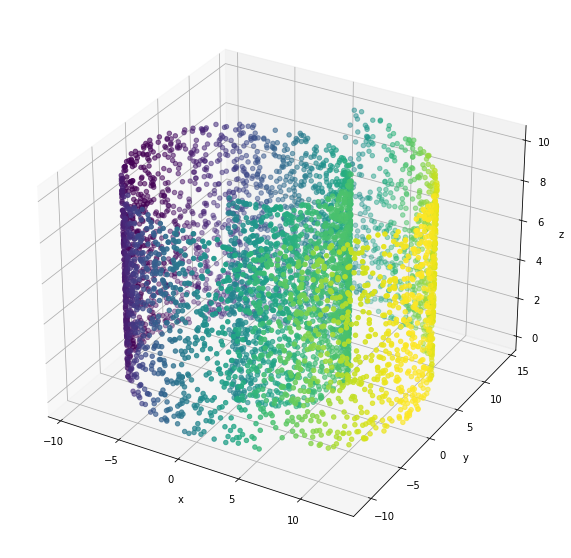

In [32]:
plt.figure(figsize=(12,10))
axes = plt.axes(projection='3d')
print(type(axes))
axes.scatter3D(X[:,0], X[:,1], X[:,2], c=X[:,0])

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')

#axes.view_init(45, 45) #(elevation, azimuth angle)

plt.show()

# Extra challenge: Klein bottle
Find the equation describing the Klein bottle problem. Generate a dataset and plot it as in Exercise 2.

$$x = -\cfrac{2}{15}\cos u \left(3\cos v -30\sin u +90\cos^4 u\sin u -60\cos^6 u\sin u +5\cos u\cos v\sin u\right)$$
$$y = -\cfrac{1}{15}\sin u \left(3\cos v -3\cos^2 u\cos v -48\cos^4 u\cos v +48\cos^6 u\cos v-60\sin u +5\cos u\cos v\sin u -5\cos^3 u \cos v\sin u - 80 \cos^5 u \cos v\sin u +80\cos^7 u \cos v \sin u \right)$$
$$z = \cfrac{2}{15} \left(3 + 5\cos u \sin u \right)\sin v$$

with $0 \leq u < \pi$ and $0 \leq v < 2\pi$

In [12]:
def klein_bottle(n):
    """
    Parameters:
    n: int
        Number of points to generate"""
    
    data = np.zeros((n,3))
    u = np.random.uniform(low=0, high=np.pi, size=n)
    v = np.random.uniform(low=0, high=2*np.pi, size=n)
            
    data[:,0]=-2/15*np.cos(u)*(3*np.cos(v)+30*np.sin(u)+90*np.cos(u)**4*np.sin(u)-60*np.cos(u)**6*np.sin(u)+5*np.cos(u)*np.cos(v)*np.sin(u))
    data[:,1]=+1/15*np.sin(u)*(3*np.cos(v)+3*np.cos(u)**2*np.cos(v)-48*np.cos(u)**4*np.cos(v)+48*np.cos(u)**6*np.cos(v)-60*np.sin(u)+5*np.cos(u)*np.cos(v)*np.sin(u)-5*np.cos(u)**3*np.cos(v)*np.sin(u)-80*np.cos(u)**5*np.cos(v)*np.sin(u)+80*np.cos(u)**7*np.cos(v)*np.sin(u))
    data[:,2]=2/15*(3+5*np.cos(u)*np.sin(u))*np.sin(v)

    return data

In [13]:
X = klein_bottle(5000)

<class 'matplotlib.axes._subplots.Axes3DSubplot'>


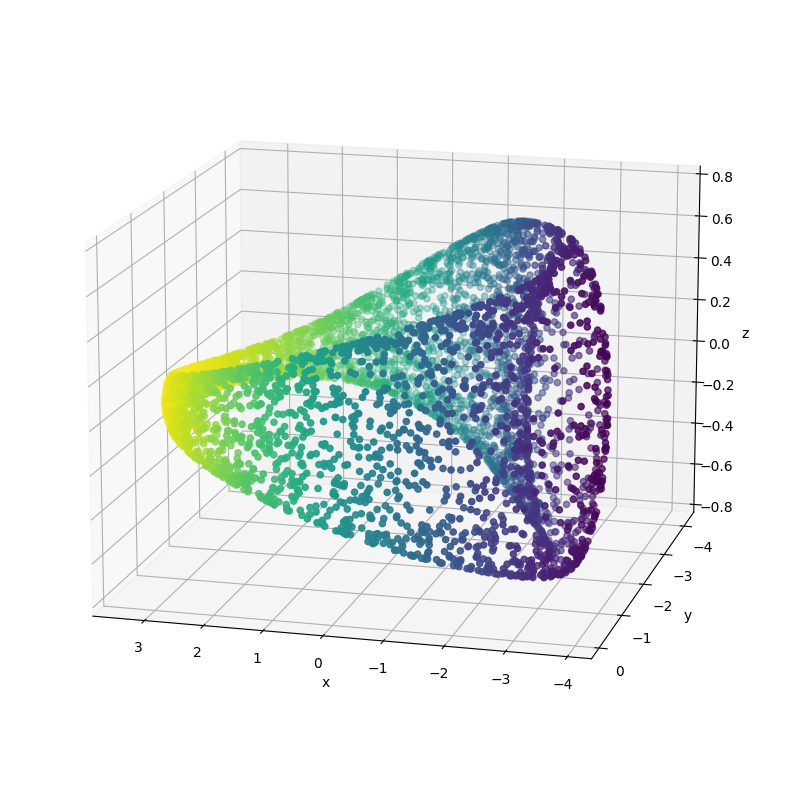

In [14]:
plt.figure(figsize=(12,10))
axes = plt.axes(projection='3d')
print(type(axes))
axes.scatter3D(X[:,0], X[:,1], X[:,2], c=X[:,0])

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')
axes.view_init(15, 105) #(elevation, azimuth angle)

plt.show()